# Overview

This notebook imports Woodstock formatted input data files and optimize the harvest scheduling considering even flow constrainsts and other constraints. 

In [1]:
%pip install gurobipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import ws3.forest, ws3.core
import csv
import numpy as np
# from util import compile_scenario, plot_scenario, cmp_c_z, cmp_c_cflw, cmp_c_caa, cmp_c_ci, gen_scenario, run_scenario
# from util import compile_scenario, plot_scenario
import gurobipy as grb
from util_walt import cmp_c_z, cmp_c_cflw, cmp_c_caa, cmp_c_ci, cmp_c_i, cmp_c_id, gen_scenario, run_scenario

In [3]:
base_year = 2020
horizon = 10
period_length = 10
max_age =  1000
tvy_name = 'totvol'
max_harvest = 1

In [4]:
fm = ws3.forest.ForestModel(model_name='redchris',
                            model_path='./data/woodstock_model_files_redchris',
                            base_year=base_year,
                            horizon=horizon,
                            period_length=period_length,
                            max_age=max_age)
fm.import_landscape_section()
fm.import_areas_section()
fm.import_yields_section()
fm.import_actions_section()
fm.import_transitions_section()
fm.initialize_areas()
fm.add_null_action()
fm.reset_actions()

fm.grow()

In [5]:
harvest_acode='harvest'
fm.actions[harvest_acode].is_harvest = True

At this point, we have a simple but fully functional ws3 model instance. 

In [6]:
# fm.reset()

Here is the age distribution for the AOI

In [7]:
fm.add_null_action()

running base scenario
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-09
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel Core Processor (Broadwell, IBRS), instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3667 rows, 34533 columns and 34533 nonzeros
Model fingerprint: 0x38763cd3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 1e+06]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3667 rows and 34533 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0063889e+07   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.03 seconds (0.01 work units)
Optimal objective  3.006388928e+07


(<Figure size 1200x400 with 3 Axes>,
    period            oha           ohv           ogs
 0       1   43682.777402  4.115325e+06  1.317725e+07
 1       2     252.227648  2.237729e+04  1.673962e+07
 2       3     152.880412  1.096929e+04  2.073558e+07
 3       4       0.000000  0.000000e+00  2.507165e+07
 4       5       0.000000  0.000000e+00  2.947751e+07
 5       6      13.610936  1.376746e+03  3.385708e+07
 6       7    1579.647990  2.749338e+05  3.784224e+07
 7       8    3974.427696  7.375195e+05  4.112177e+07
 8       9    5868.182426  1.030852e+06  4.386838e+07
 9      10  177252.930740  2.387054e+07  1.953135e+07,
 <ws3.opt.Problem at 0x7fab7d1716c0>)

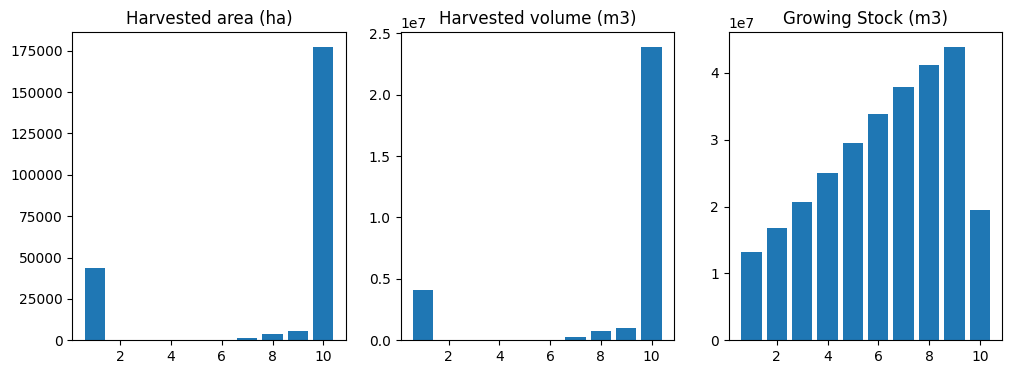

In [8]:
# Not harvesting scenario
run_scenario(fm, 'base')

In [9]:
# Business as usual scenario
# run_scenario(fm, 'bau_redchrs')